# Import Packages for analysis

In [1]:
import glob
import pynwb
from hdmf_zarr import NWBZarrIO

from aind_dynamic_foraging_data_utils import nwb_utils as df_utils
import aind_dynamic_foraging_basic_analysis.licks.annotation as annotation

# Load NWBs

[NWB files](https://www.nwb.org/) are a standard data format for sharing neurophysiology data. We can load them in python using [PyNWB](https://pynwb.readthedocs.io/en/latest/). The attached NWB file contains behavior and fiber photometry data for a single behavioral session. Here we are using the [ZarrIO backend](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/plot_zarr_io.html) for the NWB file 

### NWB file organization

The organization of the NWB file for this project is described [here](https://alleninstitute-my.sharepoint.com/:w:/g/personal/alex_piet_alleninstitute_org/Eeep60T6VnZBuzW7SA0ujrUBM6mRdNSPVVohIFDJly84Yw?e=dq9sgc)

In [2]:
# Determine filepath to our data asset
nwb_files = glob.glob('../data/**/nwb/**.nwb')

# Load the NWB file
with NWBZarrIO(path=nwb_files[0], mode="r") as io:
    nwb = io.read()

In [3]:
# See the table of trial information
nwb.trials

,start_time,stop_time,animal_response,rewarded_historyL,rewarded_historyR,delay_start_time,goCue_start_time,reward_outcome_time,bait_left,bait_right,base_reward_probability_sum,reward_probabilityL,reward_probabilityR,reward_random_number_left,reward_random_number_right,left_valve_open_time,right_valve_open_time,block_beta,block_min,block_max,min_reward_each_block,delay_beta,delay_min,delay_max,delay_duration,ITI_beta,ITI_min,ITI_max,ITI_duration,response_duration,reward_consumption_duration,auto_waterL,auto_waterR,laser_on_trial,laser_wavelength,laser_location,laser_power,laser_duration,laser_condition,laser_condition_probability,laser_start,laser_start_offset,laser_end,laser_end_offset,laser_protocol,laser_frequency,laser_rampingdown,laser_pulse_duration,auto_train_engaged,auto_train_curriculum_name,auto_train_curriculum_version,auto_train_curriculum_schema_version,auto_train_stage,auto_train_stage_overridden,lickspout_position_x,lickspout_position_y,lickspout_position_z,reward_size_left,reward_size_right
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.458900e+07,1.458901e+07,2.0,False,False,1.458901e+07,1.458901e+07,1.458901e+07,False,True,0.45,0.05,0.4,0.821522,0.339266,0.021,0.019,20.0,20.0,60.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,30.0,1.776844,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Coupled Baiting,2.2,1.0,STAGE_FINAL,NaN,9274.5,5184.0,4096.0,2.0,2.0
1,1.458901e+07,1.458902e+07,2.0,False,False,1.458902e+07,1.458902e+07,1.458902e+07,False,True,0.45,0.05,0.4,0.980469,0.944481,0.021,0.019,20.0,20.0,60.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,30.0,4.261551,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Coupled Baiting,2.2,1.0,STAGE_FINAL,NaN,9274.5,5184.5,4096.0,2.0,2.0
2,1.458902e+07,1.458903e+07,2.0,False,False,1.458903e+07,1.458903e+07,1.458903e+07,False,True,0.45,0.05,0.4,0.837998,0.859589,0.021,0.019,20.0,20.0,60.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,30.0,7.910012,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Coupled Baiting,2.2,1.0,STAGE_FINAL,NaN,9274.5,5184.5,4096.0,2.0,2.0
3,1.458903e+07,1.458904e+07,2.0,False,False,1.458903e+07,1.458904e+07,1.458904e+07,True,True,0.45,0.05,0.4,0.011791,0.707810,0.021,0.019,20.0,20.0,60.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,30.0,1.644376,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Coupled Baiting,2.2,1.0,STAGE_FINAL,NaN,9274.5,5184.5,4095.5,2.0,2.0


In [4]:
# See what data acquisitions are in this file
nwb.acquisition.keys()

dict_keys(['FIP_falling_time', 'FIP_rising_time', 'G_1', 'G_1_dff-bright', 'G_1_dff-exp', 'G_1_dff-poly', 'G_2', 'G_2_dff-bright', 'G_2_dff-exp', 'G_2_dff-poly', 'Iso_1', 'Iso_1_dff-bright', 'Iso_1_dff-exp', 'Iso_1_dff-poly', 'Iso_2', 'Iso_2_dff-bright', 'Iso_2_dff-exp', 'Iso_2_dff-poly', 'R_1', 'R_1_dff-bright', 'R_1_dff-exp', 'R_1_dff-poly', 'R_2', 'R_2_dff-bright', 'R_2_dff-exp', 'R_2_dff-poly', 'left_lick_time', 'left_reward_delivery_time', 'optogenetics_time', 'right_lick_time', 'right_reward_delivery_time'])

In [5]:
# Pick one to see the timeseries
nwb.acquisition['G_1']

G_1 pynwb.base.TimeSeries at 0x140037038324800
Fields:
  comments: no comments
  conversion: 1.0
  data: <zarr.core.Array '/acquisition/G_1/data' (120400,) float64 read-only>
  description: no description
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <zarr.core.Array '/acquisition/G_1/timestamps' (120400,) float64 read-only>
  timestamps_unit: seconds
  unit: s

# Extract dataframes

Now we will introduce project specific tools that extract and organize data from the NWB files in a way that has been structured specifically for this project. These tools will not work with NWB files from other projects. You do not need to use these tools, but the project scientists think they are helpful

### Trials dataframe
df_trials is a dataframe where each row is a trial. We can add this dataframe to the nwb object as an attribute just to keep the dataframes organized.


timestamps that are marked `absolute` are absolute with respect to the go cue on the first trial. Other timestamps are relative to the go cue for that trial (row)


In [6]:
nwb.df_trials = df_utils.create_df_trials(nwb)
nwb.df_trials

/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/nwb_utils.py:380: RuntimeWarning: All-NaN slice encountered
  lambda x: np.nanmin(
/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/nwb_utils.py:397: RuntimeWarning: All-NaN slice encountered
  lambda x: np.nanmin(np.concatenate([[np.nan], x["right_lick_time"], x["left_lick_time"]])),


,trial,start_time,stop_time,animal_response,rewarded_historyL,rewarded_historyR,delay_start_time,goCue_start_time,reward_outcome_time,bait_left,...,start_time_absolute,stop_time_absolute,delay_start_time_absolute,goCue_start_time_absolute,reward_outcome_time_absolute,reward_time,reward_time_absolute,choice_time,choice_time_absolute,reward
0,0,-3.132128,3.669856,2.0,False,False,-1.328128,0.0,0.656352,False,...,0.000000,6.808000,1.804000,3.132128,3.788480,NaN,NaN,NaN,NaN,0
1,1,-5.243744,4.015232,2.0,False,False,-0.984768,0.0,0.996736,False,...,6.808000,16.072992,11.066976,12.051744,13.048480,NaN,NaN,NaN,NaN,0
2,2,-8.895648,4.015360,2.0,False,False,-0.984640,0.0,0.996832,False,...,16.072992,28.989984,23.984000,24.968640,25.965472,NaN,NaN,NaN,NaN,0
3,3,-2.628928,4.015072,2.0,False,False,-0.984928,0.0,0.996576,True,...,28.989984,35.638976,30.633984,31.618912,32.615488,NaN,NaN,NaN,NaN,0
4,4,-3.996224,4.015776,2.0,False,False,-0.984224,0.0,0.997280,True,...,35.638976,43.656992,38.650976,39.635200,40.632480,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,538,-6.511904,3.165088,1.0,False,False,-0.984928,0.0,0.156576,True,...,5368.100000,5377.782976,5373.626976,5374.611904,5374.768480,NaN,NaN,0.1572,5374.769104,0
539,539,-10.561824,3.299200,0.0,True,False,-0.983808,0.0,0.284672,True,...,5377.782976,5391.649984,5387.360992,5388.344800,5388.629472,0.2862,5388.631000,0.2849,5388.629700,1
540,540,-2.278752,3.282240,0.0,True,False,-0.984736,0.0,0.272736,True,...,5391.649984,5397.216992,5392.944000,5393.928736,5394.201472,0.2753,5394.204036,0.2733,5394.202036,1
541,541,-15.061920,3.332064,1.0,False,False,-0.984928,0.0,0.312576,False,...,5397.216992,5415.616992,5411.293984,5412.278912,5412.591488,NaN,NaN,0.3136,5412.592512,0


### Events dataframe
`df_events` is a tidy dataframe that contains the timestamps of events in the session.

The `trial` column shows what trial the event happened during, -1 means before the first trial. Any events that happen after the last go cue are considered part of the last trial. 

`timestamps` are relative to the go cue on the first trial

The `right_reward_delivery_time` and `left_reward_delivery_time` contain annotations in the `data` column whether the reward was `earned` (delivered during the normal course of the session), `manual` (manually delivered by the experimenter), or `auto` (automatically given to boost mouse motivation)

In [7]:
nwb.df_events = df_utils.create_df_events(nwb)
print('These are the event types in this session:')
print(nwb.df_events['event'].unique())
nwb.df_events

These are the event types in this session:
['right_lick_time' 'left_lick_time' 'goCue_start_time'
 'right_reward_delivery_time' 'left_reward_delivery_time']


,timestamps,data,event,trial
0,-511.123264,1.0,right_lick_time,-1
1,-510.826560,1.0,left_lick_time,-1
2,-510.609696,1.0,left_lick_time,-1
3,-510.435328,1.0,left_lick_time,-1
4,-510.209120,1.0,left_lick_time,-1
...,...,...,...,...
4837,5449.042368,1.0,right_lick_time,543
4838,5449.117152,1.0,left_lick_time,543
4839,5449.438464,1.0,right_lick_time,543
4840,5449.452352,1.0,right_lick_time,543


### Fiber photometry dataframe

The fiber photometry dataframe ("fip") contains the timeseries of fiber photometry measurements of neurmodulators. This experiment has two fibers ("1" and "2"), and each fiber has measurements in three channels (Green, Red, and Iso). Each channel/fiber combination is preprocessed with three preprocessing methods ("poly", "exp", and "bright").

The fiber photometry measurements include 10 minutes of baseline activity before the start of the first trial.

In [8]:
nwb.df_fip = df_utils.create_df_fip(nwb, tidy=True)
print(nwb.df_fip['event'].unique())
nwb.df_fip.head(20)

['G_2_dff-exp' 'G_1_dff-exp' 'G_2' 'G_1_dff-poly' 'G_2_dff-poly'
 'G_1_dff-bright' 'G_2_dff-bright' 'FIP_rising_time' 'G_1'
 'Iso_2_dff-bright' 'Iso_1_dff-exp' 'Iso_2' 'Iso_2_dff-poly'
 'Iso_1_dff-bright' 'Iso_2_dff-exp' 'Iso_1' 'Iso_1_dff-poly'
 'FIP_falling_time' 'R_1_dff-poly' 'R_1_dff-bright' 'R_2_dff-exp'
 'R_2_dff-bright' 'R_1' 'R_2_dff-poly' 'R_2' 'R_1_dff-exp']


,timestamps,data,event
0,-599.536768,0.041524,G_2_dff-exp
1,-599.536768,0.063629,G_1_dff-exp
2,-599.536768,258.116306,G_2
3,-599.536768,0.063319,G_1_dff-poly
4,-599.536768,0.051534,G_2_dff-poly
5,-599.536768,0.099064,G_1_dff-bright
6,-599.536768,0.037850,G_2_dff-bright
7,-599.536768,1.000000,FIP_rising_time
8,-599.536768,258.072539,G_1
9,-599.522432,0.025306,Iso_2_dff-bright


In [9]:
# Filter for one channel/fiber/processing method
nwb.df_fip.query('event=="G_1_dff-poly"').head(20)


,timestamps,data,event
3,-599.536768,0.063319,G_1_dff-poly
30,-599.486784,0.063319,G_1_dff-poly
58,-599.436768,0.063319,G_1_dff-poly
83,-599.386784,0.063319,G_1_dff-poly
106,-599.336800,0.063319,G_1_dff-poly
138,-599.286784,0.063319,G_1_dff-poly
156,-599.236800,0.063319,G_1_dff-poly
188,-599.186784,0.063319,G_1_dff-poly
212,-599.136800,0.063319,G_1_dff-poly
236,-599.086784,0.063319,G_1_dff-poly


### Licks dataframe

This dataframe contains annotations of the licking patterns during the session. It segments licks into licking bouts using an interlick interval (ili) threshold of 700ms. 

timestamps (float) time relative to first go cue

event (string) whether this was a left or right lick

trial (int) what trial did this lick happen during (-1 means before the first go cue)

pre_ili (float) interlick interval before this lick

post_ili (float) interlick interval after this lick

bout_start (bool) is this lick the start of a bout

bout_end (bool) is this lick the end of a bout

bout_number (int) what licking bout was this lick a part of

rewarded (bool) was this lick rewarded? Defined as the reward being delivered within 250ms of this lick.

bout_rewarded (bool) was this bout rewarded? Defined as any licks in this bout being rewarded

cue_response (bool) was this lick in response to a go cue? Defined as the first lick within 1s of a go cue

bout_cue_response (bool) was this bout in response to a go cue? Defined as any licks in this bout being cue_response

In [10]:
nwb.df_licks = annotation.annotate_licks(nwb)
nwb.df_licks.head(20)

,timestamps,data,event,trial,pre_ili,post_ili,bout_start,bout_end,bout_number,rewarded,bout_rewarded,cue_response,bout_cue_response,intertrial_choice,bout_intertrial_choice,cue_switch,iti_switch,bout_cue_switch,bout_iti_switch,within_session
0,-511.123264,1.0,right_lick_time,-1,NaN,0.296704,True,False,1,False,False,False,False,True,True,False,False,False,False,False
1,-510.826560,1.0,left_lick_time,-1,0.296704,0.216864,False,False,1,False,False,False,False,False,True,False,False,False,False,False
2,-510.609696,1.0,left_lick_time,-1,0.216864,0.174368,False,False,1,False,False,False,False,False,True,False,False,False,False,False
3,-510.435328,1.0,left_lick_time,-1,0.174368,0.226208,False,False,1,False,False,False,False,False,True,False,False,False,False,False
4,-510.209120,1.0,left_lick_time,-1,0.226208,0.525440,False,False,1,False,False,False,False,False,True,False,False,False,False,False
5,-509.683680,1.0,right_lick_time,-1,0.525440,0.030816,False,False,1,False,False,False,False,False,True,False,False,False,False,False
6,-509.652864,1.0,right_lick_time,-1,0.030816,16.135616,False,True,1,False,False,False,False,False,True,False,False,False,False,False
7,-493.517248,1.0,right_lick_time,-1,16.135616,0.146560,True,False,2,False,False,False,False,True,True,False,False,False,False,False
8,-493.370688,1.0,right_lick_time,-1,0.146560,0.369408,False,False,2,False,False,False,False,False,True,False,False,False,False,False
9,-493.001280,1.0,left_lick_time,-1,0.369408,0.217056,False,False,2,False,False,False,False,False,True,False,False,False,False,False


## Plotting Tools

### Session visualizer
In this session, three of the FIP channels do not have an active sensor, so we only see noise. The fourth channel, has a biological signal. Take a few minutes to scroll through the session.

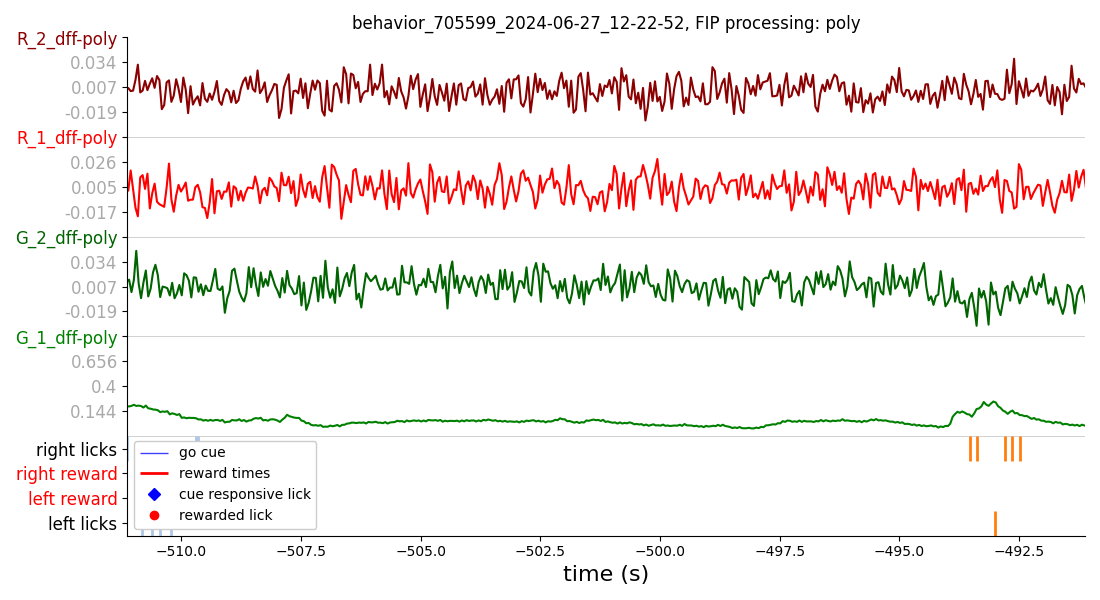

In [11]:
# These two commands are required for interactive matplotlib plots in the notebook
%matplotlib inline
%matplotlib ipympl

# Import some tools
from aind_dynamic_foraging_basic_analysis.plot import plot_session_scroller as pss 
import matplotlib.pyplot as plt

# This makes an interactive plot for viewing the photometry and behavior data
# Press up arrow to zoom out (in time)
# Press down arrow to zoom in (in time)
# Press left arrow to go back in time
# Press right arrow to go forward in time
fig, ax = plt.subplots(figsize = (11,6)) # Adjust the figure size depening on your computer screen size
pss.plot_session_scroller(nwb, plot_bouts=True, processing="poly", ax = ax, fig = fig)
plt.show()

## PSTH

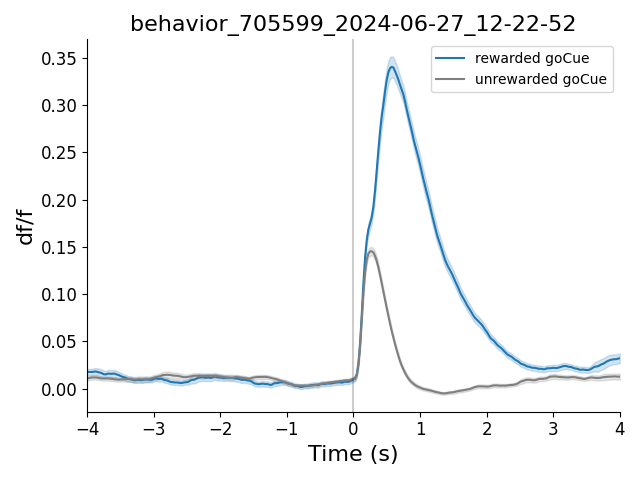

In [12]:
# Import a plotting tool
from aind_dynamic_foraging_basic_analysis.plot import plot_fip as pf

# Find the timepoints to align
rewarded_go_cues = nwb.df_trials.query('reward == 1')['goCue_start_time_absolute'].values
unrewarded_go_cues = nwb.df_trials.query('reward == 0')['goCue_start_time_absolute'].values

# Compute and plot the PSTH
pf.plot_fip_psth_compare_alignments(nwb, {'rewarded goCue':rewarded_go_cues, 'unrewarded goCue':unrewarded_go_cues},'G_1_dff-poly', censor=True)
plt.show()